##Задача 1

In [ ]:
Variant<-10
set.seed(Variant) 
m<-sample(c(4:18),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu)
  {current<-lambda; 
   lambda<-mu; 
   mu<-current}
gamma<-runif(1)
nu<-runif(1)
if (gamma<nu)
  {current<-nu; 
   nu<-gamma; 
   gamma<-current}
if (sample(c(0:1),1)) 
{k<-sample(c(4:7),1)} else {k<-"inf"}
t<-runif(1)
print("--------------")
View(data.frame(lambda, mu, nu, gamma, k, m, t))

[1] "--------------"


lambda    mu        nu         gamma     k   m  t        
1 0.3067685 0.4269077 0.08513597 0.6931021 inf 14 0.2745305

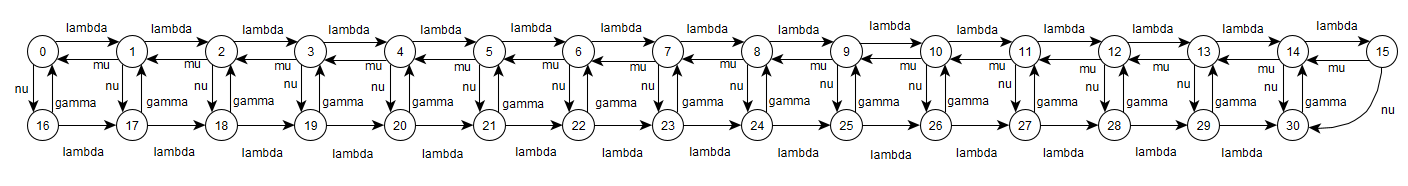

In [ ]:
install.packages("deSolve")
library("deSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



###Поиск вероятностей

In [ ]:
#Система уравнений
Kolmogorovs = function(t, state, parametres) {
  with(as.list(c(state, parametres)), {
    dP0 = mu*P1 - lambda*P0 + gamma*P16 - nu*P0
    dP1 = mu*P2 - lambda*P1 + gamma*P17 - nu*P1 + lambda*P0 - mu*P1
    dP2 = mu*P3 - lambda*P2 + gamma*P18 - nu*P2 + lambda*P1 - mu*P2
    dP3 = mu*P4 - lambda*P3 + gamma*P19 - nu*P3 + lambda*P2 - mu*P3
    dP4 = mu*P5 - lambda*P4 + gamma*P20 - nu*P4 + lambda*P3 - mu*P4
    dP5 = mu*P6 - lambda*P5 + gamma*P21 - nu*P5 + lambda*P4 - mu*P5
    dP6 = mu*P7 - lambda*P6 + gamma*P22 - nu*P6 + lambda*P5 - mu*P6
    dP7 = mu*P8 - lambda*P7 + gamma*P23 - nu*P7 + lambda*P6 - mu*P7
    dP8 = mu*P9 - lambda*P8 + gamma*P24 - nu*P8 + lambda*P7 - mu*P8
    dP9 = mu*P10 - lambda*P9 + gamma*P25 - nu*P9 + lambda*P8 - mu*P9
    dP10 = mu*P11 - lambda*P10 + gamma*P26 - nu*P10 + lambda*P9 - mu*P10
    dP11 = mu*P12 - lambda*P11 + gamma*P27 - nu*P11 + lambda*P10 - mu*P11
    dP12 = mu*P13 - lambda*P12 + gamma*P28 - nu*P12 + lambda*P11 - mu*P12
    dP13 = mu*P14 - lambda*P13 + gamma*P29 - nu*P13 + lambda*P12 - mu*P13
    dP14 = mu*P15 - lambda*P14 + gamma*P30 - nu*P14 + lambda*P13 - mu*P14
    dP15 = - nu*P15 + lambda*P14 - mu*P15
    
    dP16 = nu*P0 - gamma*P16 - lambda*P16
    dP17 = nu*P1 - gamma*P17 - lambda*P17 + lambda*P16
    dP18 = nu*P2 - gamma*P18 - lambda*P18 + lambda*P17
    dP19 = nu*P3 - gamma*P19 - lambda*P19 + lambda*P18
    dP20 = nu*P4 - gamma*P20 - lambda*P20 + lambda*P19
    dP21 = nu*P5 - gamma*P21 - lambda*P21 + lambda*P20
    dP22 = nu*P6 - gamma*P22 - lambda*P22 + lambda*P21
    dP23 = nu*P7 - gamma*P23 - lambda*P23 + lambda*P22
    dP24 = nu*P8 - gamma*P24 - lambda*P24 + lambda*P23
    dP25 = nu*P9 - gamma*P25 - lambda*P25 + lambda*P24
    dP26 = nu*P10 - gamma*P26 - lambda*P26 + lambda*P25
    dP27 = nu*P11 - gamma*P27 - lambda*P27 + lambda*P26
    dP28 = nu*P12 - gamma*P28 - lambda*P28 + lambda*P27
    dP29 = nu*P13 - gamma*P29 - lambda*P29 + lambda*P28
    dP30 = nu*P14 + nu*P15 - gamma*P30 + lambda*P29
    condNorm = P0 + P1 + P2 + P3 + P4 + P5 + P6 + P7 + P8 + P9 + P10 + P11 + P12 + P13 + P14 + P15 + P16 + P17 + P18 + P19 + P20 + P21 + P22 + P23 + P24 + P25 + P26 + P27 + P28 + P29 + P30

    list(c(dP0, dP1, dP2, dP3, dP4, dP5, dP6, dP7, dP8, dP9, dP10, dP11, dP12, dP13, dP14, dP15, dP16, dP17, dP18, dP19, dP20, dP21, dP22, dP23, dP24, dP25, dP26, dP27, dP28, dP29, dP30), condNorm = 1)
  })
}

In [ ]:
state = c(P0 = 1, P1 = 0, P2 = 0, P3 = 0, P4 = 0, P5 = 0, P6 = 0, P7 = 0, P8 = 0, P9 = 0, P10 = 0, P11 = 0, P12 = 0, P13 = 0, P14 = 0, P15 = 0, P16 = 0, P17 = 0, P18 = 0, P19 = 0, P20 = 0, P21 = 0, P22 = 0, P23 = 0, P24 = 0, P25 = 0, P26 = 0, P27 = 0, P28 = 0, P29 = 0, P30 = 0)
times = seq(0, 1, by = 0.000001)

In [ ]:
out = ode(y = state, times = times, func = Kolmogorovs, parms = NULL)

In [ ]:
outDF = as.data.frame(out[, 1:32])
rownames(outDF) = outDF$time
#Вероятности для заданного t
Ptau = outDF[outDF$time == round(t, 5), 2:32]
Ptau

P0        P1         P2          P3           P4           P5          
0.27453 0.9041635 0.07174824 0.002959919 8.223515e-05 1.720608e-06 2.885995e-08
        P6           P7           P8           P9           ⋯ P21         
0.27453 4.038725e-10 4.848081e-12 5.094714e-14 4.760677e-16 ⋯ 6.547612e-10
        P22          P23          P24          P25          P26         
0.27453 9.170201e-12 1.101387e-13 1.157865e-15 1.082259e-17 9.106001e-20
        P27          P28          P29         P30         
0.27453 6.966167e-22 4.885628e-24 3.16318e-26 1.912572e-28

Вероятности для бесконечного t:

In [ ]:
lambda:0.3067685$ nu: 0.08513597$ gamma:0.6931021$ mu:0.4269077$

solve([0 = mu*P1 - lambda*P0 + gamma*P16 - nu*P0,
0= mu*P2 - lambda*P1 + gamma*P17 - nu*P1 + lambda*P0 - mu*P1,
0= mu*P3 - lambda*P2 + gamma*P18 - nu*P2 + lambda*P1 - mu*P2,
0= mu*P4 - lambda*P3 + gamma*P19 - nu*P3 + lambda*P2 - mu*P3,
0= mu*P5 - lambda*P4 + gamma*P20 - nu*P4 + lambda*P3 - mu*P4,
0= mu*P6 - lambda*P5 + gamma*P21 - nu*P5 + lambda*P4 - mu*P5,
0= mu*P7 - lambda*P6 + gamma*P22 - nu*P6 + lambda*P5 - mu*P6,
0= mu*P8 - lambda*P7 + gamma*P23 - nu*P7 + lambda*P6 - mu*P7,
0= mu*P9 - lambda*P8 + gamma*P24 - nu*P8 + lambda*P7 - mu*P8,
0= mu*P10 - lambda*P9 + gamma*P25 - nu*P9 + lambda*P8 - mu*P9,
0 = mu*P11 - lambda*P10 + gamma*P26 - nu*P10 + lambda*P9 - mu*P10,
0 = mu*P12 - lambda*P11 + gamma*P27 - nu*P11 + lambda*P10 - mu*P11,
0 = mu*P13 - lambda*P12 + gamma*P28 - nu*P12 + lambda*P11 - mu*P12,
0 = mu*P14 - lambda*P13 + gamma*P29 - nu*P13 + lambda*P12 - mu*P13,
0 = mu*P15 - lambda*P14 + gamma*P30 - nu*P14 + lambda*P13 - mu*P14,
0 = - nu*P15 + lambda*P14 - mu*P15,
    
0 = nu*P0 - gamma*P16 - lambda*P16,
0 = nu*P1 - gamma*P17 - lambda*P17 + lambda*P16,
0 = nu*P2 - gamma*P18 - lambda*P18 + lambda*P17,
0 = nu*P3 - gamma*P19 - lambda*P19 + lambda*P18,
0 = nu*P4 - gamma*P20 - lambda*P20 + lambda*P19,
0 = nu*P5 - gamma*P21 - lambda*P21 + lambda*P20,
0 = nu*P6 - gamma*P22 - lambda*P22 + lambda*P21,
0 = nu*P7 - gamma*P23 - lambda*P23 + lambda*P22,
0 = nu*P8 - gamma*P24 - lambda*P24 + lambda*P23,
0 = nu*P9 - gamma*P25 - lambda*P25 + lambda*P24,
0 = nu*P10 - gamma*P26 - lambda*P26 + lambda*P25,
0 = nu*P11 - gamma*P27 - lambda*P27 + lambda*P26,
0 = nu*P12 - gamma*P28 - lambda*P28 + lambda*P27,
0 = nu*P13 - gamma*P29 - lambda*P29 + lambda*P28,
    P0 + P1 + P2 + P3 + P4 + P5 + P6 + P7 + P8 + P9 + P10 + P11 + P12 + P13 + P14 + P15 + P16 + P17 + P18 + P19 + P20 + P21 + P22 + P23 + P24 + P25 + P26 + P27 + P28 + P29 + P30= 1],
      [P0, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21, P22, P23, P24, P25, P26, P27, P28, P29, P30]);


In [ ]:
P0=0.179318126589372
P1=0.139826516092352
P2=0.1123984056672602
P3=0.09130227665393874
P4=0.07442672264541732
P5=0.06074115108482351
P6=0.04959124033987773
P7=0.04049323189898805
P8=0.03306574170856422
P9=0.02700101980057358
P10=0.02204875504613723
P11=0.01800481409392717
P12=0.01470257588853145
P13=0.01200599865865173
P14=0.009803997125666462
P15=0.005873634747296091
P16=0.0152683983765189
P17=0.01659027652839291
P18=0.01466041859630235
P19=0.01227205051163741
P20=0.01010237700130178
P21=0.00827141817715897
P22=0.006760283677626297
P23=0.005521987204659475
P24=0.00450963927324261
P25=0.00368264982199173
P26=0.003007252248503915
P27=0.002455705342222617
P28=0.002005310591234862
P29=0.001637520358864682
P30=0.002650504248963981

data = data.frame(P0, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21, P22, P23, P24, P25, P26, P27, P28, P29, P30)

data

P0        P1        P2        P3         P4         P5         P6        
1 0.1793181 0.1398265 0.1123984 0.09130228 0.07442672 0.06074115 0.04959124
  P7         P8         P9         ⋯ P21         P22         P23        
1 0.04049323 0.03306574 0.02700102 ⋯ 0.008271418 0.006760284 0.005521987
  P24         P25        P26         P27         P28         P29       
1 0.004509639 0.00368265 0.003007252 0.002455705 0.002005311 0.00163752
  P30        
1 0.002650504

###Теоретические вычисления

In [ ]:
#Веоятность простоя
P0 + sum(data[17:31])


[1] 0.2887139

In [ ]:
#Вероятность образования очереди
1 - (P0 + P1 + P17)

[1] 0.6642651

In [ ]:
#Абсолютная пропускная способность
Alambda = mu*(sum(data[2:16]))
Alambda

[1] 0.3036535

In [ ]:
#Средняя длина очереди
Loch = 0
for (i in 1:14) {
  Loch = Loch + i*(data[i + 2] + data[i + 17])
}
Loch[1,1]

[1] 3.046076

In [ ]:
#Среднее число заявок в системе
Lsys = 0
for (i in 1:14) {
  Lsys = Lsys + i*(data[i + 1] + data[i + 17])
}
Lsys = Lsys + 15*P16
Lsys[1,1]

[1] 3.898284

In [ ]:
#Среднее время нахождения заявок в системе
(Lsys / Alambda)[1,1]

[1] 12.83793

In [ ]:
#Среднее время нахождения в очереди
(Loch / Alambda)[1,1]

[1] 10.03142

###Экспериментальные вычисления

In [ ]:

t = 0
Time = 10000
h = 0.001
Tcome = c()
Tstart = c()
Tend = c()
Busy = c(0,0)
Loch = c(0)
Lsys = c(0)
Tstart[1] = NA

och_programm = c()

working_prog = c()

idx_come = 0


come_time = rexp(1, lambda)

err_time = rexp(1, nu)
working = 1
fix_time = Time

working_prog[1] = 0
working_prog[2] = 0

while (t < Time) {

  #Если сервер выполнил программу
  if ((working_prog[1] <= t) & (working_prog[1] != 0)) { 
    
    Tend[working_prog[2]] = t
    
    working_prog[1] = 0
    working_prog[2] = 0
  }


  #Если сервер восстановился
  if (fix_time < t) {
    working = 1
    fix_time = Time
    err_time = t +rexp(1, nu)
  }


  #Если сервер отказал
  if (err_time <= t) {
    working = 0
    fix_time = t + rexp(1, gamma)
    err_time = Time
    #Если сервер был занят
    if (working_prog[1] != 0) {
      #Если очередь не полна
      if (length(och_programm) < m) {
          och_programm = c(och_programm, working_prog[2])
      }
      working_prog[1] = 0
      working_prog[2] = 0
    } 
  }

  #Если сервер должен принять программу
  if ((working_prog[1] == 0) & (length(och_programm) != 0) & (working == 1)) {
    working_prog[1] = t + rexp(1, mu)
    working_prog[2] = och_programm[1]

    Tstart[working_prog[2]] = t
    och_programm = och_programm[-1]
  }

  #Если пришла программа
  if (t >= come_time) { 
    
    idx_come = idx_come + 1
  
    Tcome[idx_come] = t
    #Если в очереди есть места
    if (length(och_programm) < m) {
      och_programm = c(och_programm, idx_come)
    }
    
    come_time = t + rexp(1, lambda)
  }

  if (working_prog[1] != 0){
    Busy[2] = Busy[2] + 1
  }
  else {
    Busy[1] = Busy[1] + 1
  }

  if (toString(Loch[length(och_programm) + 1]) == "NA") {
    Loch[length(och_programm) + 1] = 0
  }
  Loch[length(och_programm) + 1] = Loch[length(och_programm) + 1] + 1
  t = t + h


  if (toString(Lsys[length(och_programm) + 2]) == "NA") {
    Lsys[length(och_programm) + 2] = 0
  }
  if (length(och_programm) > 0) {
    Lsys[length(och_programm) + 2] = Lsys[length(och_programm) + 2] + 1
  }
  else if (working_prog[1] != 0) {
    Lsys[2] = Lsys[2] + 1
  }
  else {
    Lsys[1] = Lsys[1] + 1
  }


  t = t + h
}

print("Вероятность простоя:")
Busy[1]/sum(Busy)


print("Вероятность образования очереди:")
1 - Loch[1] / sum(Loch)


print("Абсолютная пропускная способность:")
length(Tend[!is.na(Tend)])/Time


print("Средняя длина очереди:")
mean_Loch = 0
for (i in 1:length(Loch)) {
  mean_Loch = mean_Loch + (i-1)*Loch[i]
}
mean_Loch = mean_Loch/sum(Loch)
mean_Loch


print("Cреднее время нахождения заявок в системе:")
mean(Tend - Tcome[1:length(Tend)], na.rm = TRUE)


print("Cреднее число заявок в системе:")
mean_Lsys = 0
for (i in 1:length(Lsys)) {
  mean_Lsys = mean_Lsys + (i-1)*Lsys[i]
}
mean_Lsys = mean_Lsys/sum(Loch)
mean_Lsys

print("Cреднее время нахождения в очереди:")
mean(Tstart - Tcome[1:length(Tstart)], na.rm = TRUE)


[1] "Вероятность простоя:"


[1] 0.259634

[1] "Вероятность образования очереди:"


[1] 0.7092316

[1] "Абсолютная пропускная способность:"


[1] 0.3063

[1] "Средняя длина очереди:"


[1] 3.271236

[1] "Cреднее время нахождения заявок в системе:"


[1] 12.99451

[1] "Cреднее число заявок в системе:"


[1] 4.111778

[1] "Cреднее время нахождения в очереди:"


[1] 11.04534